In [13]:
import sys
sys.path.append('..')

In [14]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data

- generate random file

In [15]:
import random

# Generate the file
with open('../data/mock_file.txt', 'w') as file:
    for _ in range(100):  # Change the number to generate more or fewer lines
        string = ''.join(random.choice(f.POSSIBLE_AMINOACIDS) for _ in range(12))
        number = random.randint(-10000, 10000)/100  # Change the range for different number values
        file.write(f'{string}  {number}\n')

- read data

In [16]:
from pennylane import numpy as np
file_path = '../data/mock_file.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/100
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

# Print the resulting lists
print("Angles List:", angles_list)
print("Score List:", score_list)
print("shapes:", angles_list.shape, score_list.shape)

Angles List: [[1.3962634  0.6981317  1.3962634  ... 1.74532925 4.1887902  2.0943951 ]
 [3.14159265 1.3962634  5.58505361 ... 2.7925268  2.0943951  3.83972435]
 [1.74532925 5.93411946 5.23598776 ... 1.3962634  3.14159265 0.6981317 ]
 ...
 [5.93411946 3.83972435 5.58505361 ... 2.0943951  1.04719755 2.0943951 ]
 [6.28318531 4.1887902  4.88692191 ... 0.         3.83972435 2.44346095]
 [2.7925268  0.         2.44346095 ... 5.93411946 1.04719755 2.44346095]]
Score List: [-6.236e-01 -9.930e-01  5.669e-01 -2.738e-01  2.349e-01 -4.744e-01
 -3.146e-01  2.789e-01 -2.839e-01 -9.019e-01 -9.848e-01 -6.302e-01
  5.045e-01 -3.168e-01 -1.536e-01  2.837e-01  6.274e-01 -9.736e-01
  5.190e-02  5.745e-01  1.277e-01 -8.812e-01 -8.978e-01  2.813e-01
  2.147e-01 -1.380e-02 -7.562e-01  2.690e-02 -6.764e-01 -6.060e-02
 -2.377e-01  4.164e-01  5.060e-02 -7.307e-01 -8.115e-01  2.124e-01
 -2.850e-02  3.260e-02  7.335e-01  1.925e-01 -9.060e-02 -6.923e-01
  4.621e-01  3.675e-01  9.352e-01  1.909e-01  4.530e-02  8.768

- create validation data

In [17]:
X, Y, X_validation, Y_validation = f.create_validating_set(angles_list, score_list, percentage=0.1)

In [18]:
data = [X, Y]
data_validation = [X_validation, Y_validation]

Optimization

In [19]:
circuit_layers = [
    layers.angle_preparation(),
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.rotation_layer(), 
    layers.CNOTs_layer(), 
    layers.mesurament(qubits=[0])
]

In [20]:
S = m.score_predictor(n_qubits=12, data=data, circuit_layers=circuit_layers, batch_size=10)


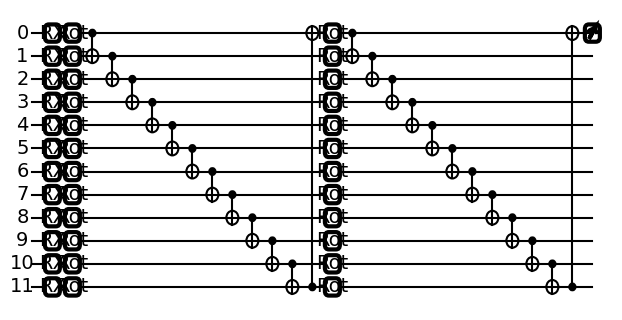

In [21]:
S.draw_circuit()

In [23]:
S.train(30)

KeyboardInterrupt: 